<a href="https://colab.research.google.com/github/MehmoodBhutta/KS-project-DS-/blob/main/KS_DS_Project_FINAL-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load in Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projectoo/cybersecurity_attacks.csv')
df.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# DataCleaning

In [4]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [5]:
df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source'], axis=1, inplace=True)

In [6]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [11]:
df['Malware Indicators'].fillna('None Detected', inplace=True)
df['Alerts/Warnings'].fillna('No Alert', inplace=True)

In [12]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert,Malware,Known Pattern B,Logged,0,Segment A
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert,Malware,Known Pattern A,Blocked,0,Segment B
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,0,Segment C
3,UDP,385,Data,HTTP,None Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,1,Segment B
4,TCP,1462,Data,DNS,None Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,0,Segment C


# EDA

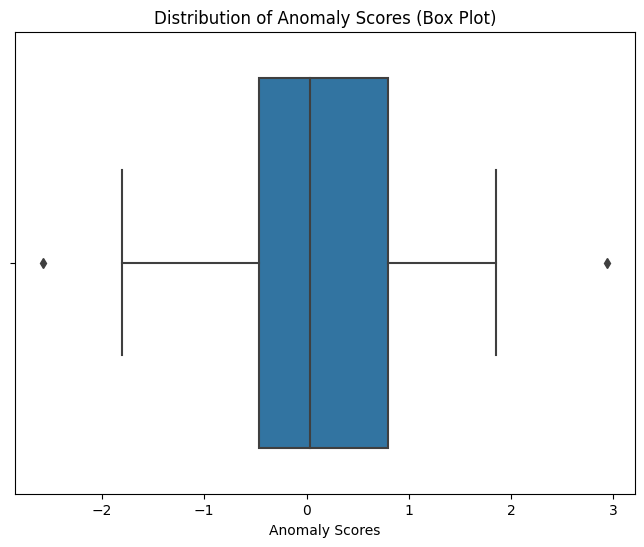

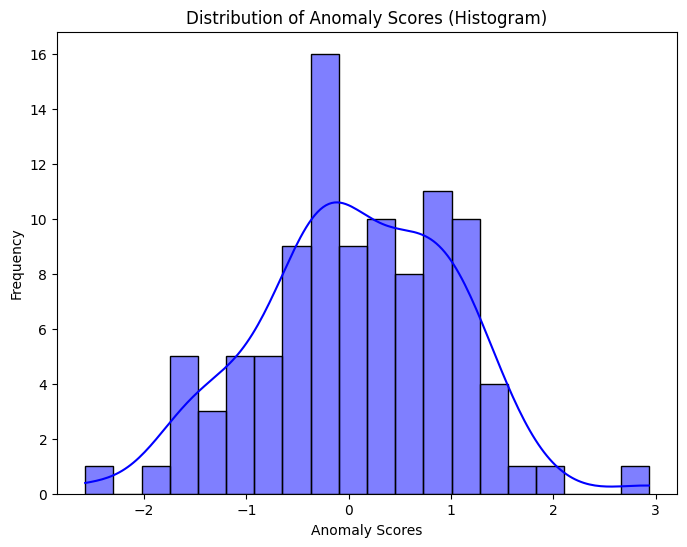

In [7]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

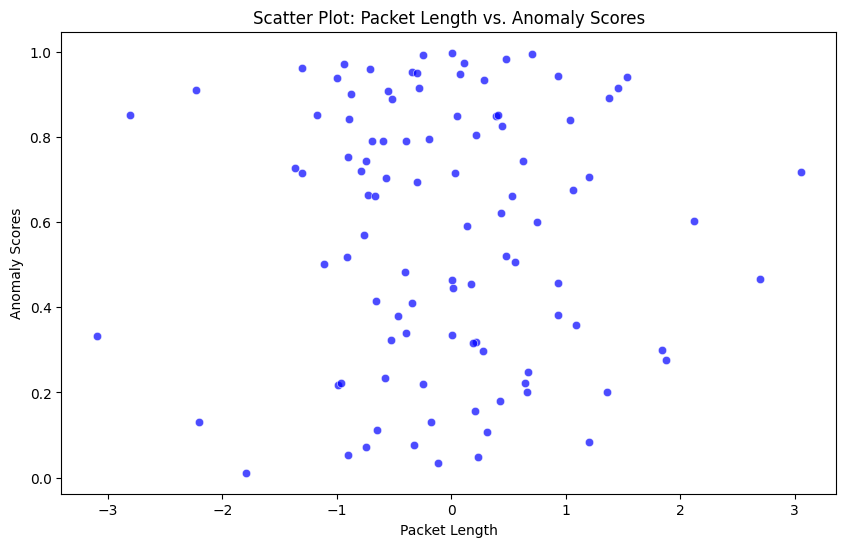

In [8]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

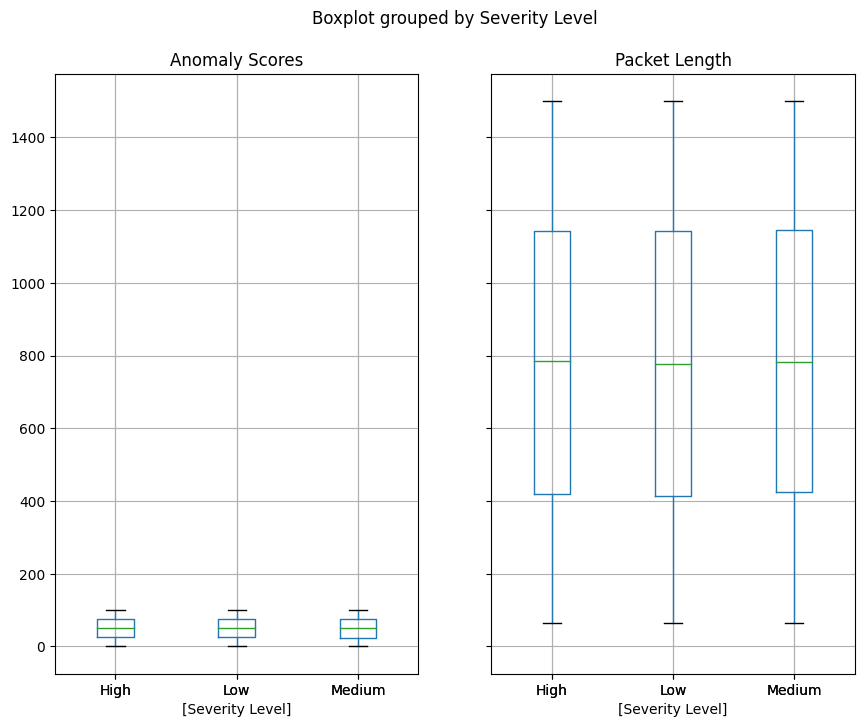

In [9]:
df.boxplot(figsize=(10,8), by='Severity Level')
plt.show()

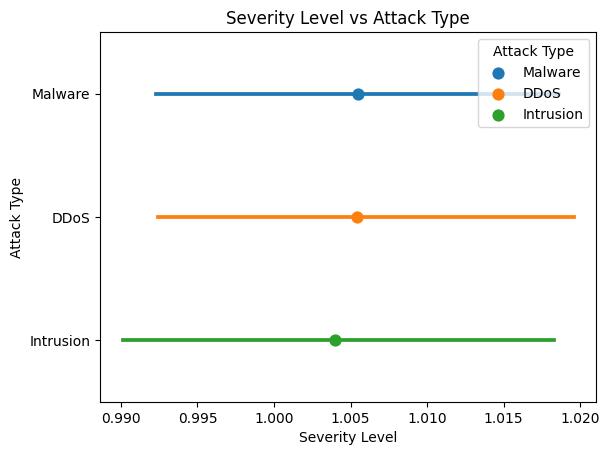

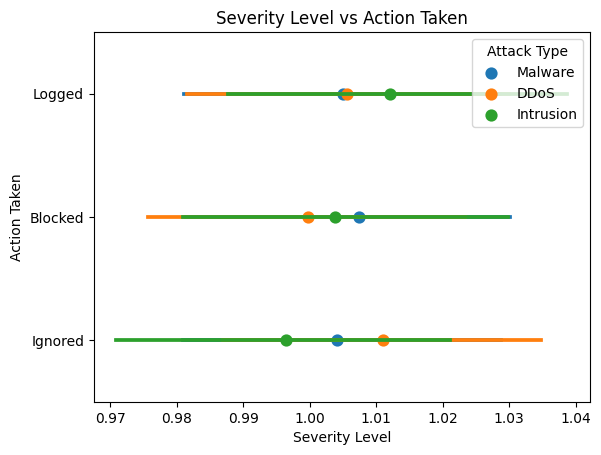

In [10]:
df['Severity Level'] = pd.factorize(df['Severity Level'])[0]

# Point plot for Attack Type
sns.pointplot(data=df, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# Point plot for Action Taken
sns.pointplot(data=df, x="Severity Level", y="Action Taken", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# PipeLines

In [14]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [35]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length', 'Anomaly Scores']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X_train = df [categorical_features + numerical_features]
y_train = df['Anomaly Scores']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])



In [36]:
X_transformed = pipeline.fit_transform(df)

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length',
                                                   'Anomaly Scores'])]))])

# ML

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [51]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']

numerical_features = ['Packet Length', 'Anomaly Scores']

target_column = 'Severity Level'

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = pd.concat([df_encoded[numerical_features], df_encoded.drop(numerical_features + [target_column], axis=1)], axis=1)
y = df_encoded[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.659774772348927
